# Genome Information Density

This notebook analyzes 6 genomes and their repeatability in regards to 8-grams. It compares the number of distinct n-grams to the length of the genome sequence scanned.



**Plots** for visualizing n-gram repeatability:


   - **Main Superimposed Plots**
       - This first algorithm returns the fraction of non-unique 8-grams. It shows the increasing repetition found in the 8-grams of each genome sequence. With NumPy and Matplotlib, it creates the superimposed genome plot
           - n_non_unique = the number of 8-grams that repeat at least once
           - n_unique = the number of 8-grams that occur only once
           - n_non_unique / (n_non_unique + n_unique) = the fraction of non-unique, or repeated, 8-grams
       - Logarithmic axes are used for plotting
           - Log(0) is -∞, which is not shown in the first plot using the algorithm.
           - Log(a positive number) is a real number, which is shown on the plot.
           - Thus, as more repetitions occur in the genomes, the plot increase from -∞
               

   - **Other Plots (Initial Tries)** - shows the # of distinct 8-grams vs sequence length
       - More About Genome 1 (Aaosphaeria arxii)
           - 1st plot: 100,000 base pairs, 8-gram. Logarithmic axes are used for plotting
           - 2nd plot: 100,000 base pairs, 8-gram. No logarithmic axes are used for plotting
           - 3rd plot: Entire Filtered Genome 1, 3-gram
       - More About Genome 2 (Abiotrophia defectiva)
           - Plot: Filtered of Genome 2 (1,000,000 base pairs, 8-grams)
       - More About Genome 3 (Abditibacterium utsteinense)
           - Plot: Filtered Genome 3 (1,000,000 base pairs, 8-grams)

# Plotting

## Main Superimposed Plots

In [184]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [185]:
import numpy as np

In [186]:
import matplotlib.pyplot as plt

In [187]:
files = {'Aaosphaeria arxii (Eukaryota)': 'genomes/genome1_filtered.fna',
         'Abiotrophia defectiva (Bacteria)': 'genomes/genome2_filtered.fna',
         'Abditibacterium utsteinense (Bacteria)':'genomes/genome3_filtered.fna',
         'Sars-CoV-2':'genomes/Sars-CoV-2_Genome.fna',
         'Homo sapiens chromosome 21 open reading frame 91':'genomes/Homo Sapiens Chromosome 21.fna',
         'Tai Forest Ebolavirus (Ivory Coast)': 'genomes/Tai_Forest_Ebolavirus_(ivory cost).fna'}

In [188]:
for (genome_name, file_path) in files.items(): 
    print((genome_name, file_path))

('Aaosphaeria arxii (Eukaryota)', 'genomes/genome1_filtered.fna')
('Abiotrophia defectiva (Bacteria)', 'genomes/genome2_filtered.fna')
('Abditibacterium utsteinense (Bacteria)', 'genomes/genome3_filtered.fna')
('Sars-CoV-2', 'genomes/Sars-CoV-2_Genome.fna')
('Homo sapiens chromosome 21 open reading frame 91', 'genomes/Homo Sapiens Chromosome 21.fna')
('Tai Forest Ebolavirus (Ivory Coast)', 'genomes/Tai_Forest_Ebolavirus_(ivory cost).fna')


In [190]:
ndistinct_by_genome = {}

for (genome_name, file_path) in files.items():
    with open(file_path) as myfile:
        data = myfile.read().replace('\n','')
        genome = data[:90000]
    ngramcounts = dict()
    ndistinct = []
    for (i,x) in enumerate(seq_ngrams2(genome,8)):
        if x in ngramcounts.keys():
            ngramcounts[x] += 1
        else:
            ngramcounts[x] = 1
        n_non_unique = len([kmer for kmer in ngramcounts.keys() if ngramcounts[kmer] > 1])
        n_unique = len([kmer for kmer in ngramcounts.keys() if ngramcounts[kmer] == 1])
        ndistinct.append(n_non_unique / (n_non_unique + n_unique))
    ndistinct_by_genome[genome_name] = ndistinct
ndistinct[-1]

0.19356112976496148

In [193]:
ndistinct_by_genome = {}

for (genome_name, file_path) in files.items():
    with open(file_path) as myfile:
        data = myfile.read().replace('\n','')
        genome = data[:90000]
    ngramcounts = dict()
    ndistinct = []
    for (i,x) in enumerate(seq_ngrams2(genome,8)):
        if x in ngramcounts.keys():
            ngramcounts[x] += 1
        else:
            ngramcounts[x] = 1
        n_non_unique = len([kmer for kmer in ngramcounts.keys() if ngramcounts[kmer] > 1])
        n_unique = len([kmer for kmer in ngramcounts.keys() if ngramcounts[kmer] == 1])
        ndistinct.append(n_non_unique / (n_non_unique + n_unique))
    ndistinct_by_genome[genome_name] = ndistinct
ndistinct[-1]

0.19356112976496148

In [194]:
ndistinct_by_genome["Abiotrophia defectiva (Bacteria)"][-1]

0.5502224135457024

[0.5426283358739292, 0.5426283358739292, 0.5426498056980913, 0.5426712755222535, 0.5426927453464157, 0.5426927453464157, 0.5427142151705777, 0.5427142151705777, 0.5427142151705777, 0.5427142151705777]
[0.5502642971608984, 0.5502642971608984, 0.5502642971608984, 0.5502642971608984, 0.5502511360918441, 0.5502750538148768, 0.5502618928033293, 0.5502487324213144, 0.5502355726687872, 0.5502224135457024]
[0.5530828569842944, 0.5530828569842944, 0.5530828569842944, 0.5530828569842944, 0.5530828569842944, 0.5530828569842944, 0.5530828569842944, 0.5530828569842944, 0.5530828569842944, 0.5530828569842944]
[0.2558512058378571, 0.25583982202447164, 0.25583982202447164, 0.25583982202447164, 0.25583982202447164, 0.25583982202447164, 0.25583982202447164, 0.25583982202447164, 0.25588431590656285, 0.255872931126535]
[0.327529814320938, 0.32758013384994716, 0.32758013384994716, 0.32763045337895635, 0.32763045337895635, 0.32763045337895635, 0.32763045337895635, 0.32763045337895635, 0.32763045337895635, 0

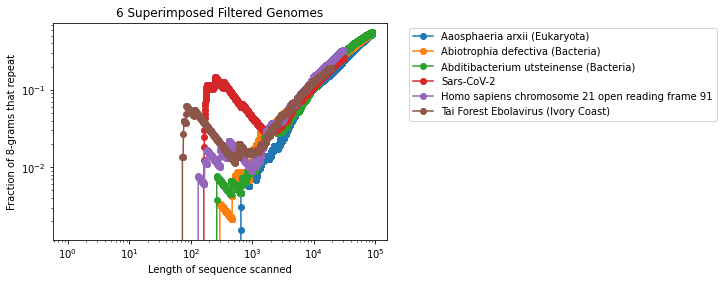

In [195]:
for genome_name in files.keys():
    y = ndistinct_by_genome[genome_name]
    x = np.arange(len(y))
    plt.plot(x, y,"o-",label = genome_name)
    print(y[-10:])

ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")

# naming the x axis
plt.xlabel('Length of sequence scanned')
# naming the y axis
plt.ylabel('Fraction of 8-grams that repeat')

# giving a title to my graph
plt.title('6 Superimposed Filtered Genomes')

# function to show the plot
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
#plt.show()

## Other Plots (Intial Work)

### More About Genome 1 (Aaosphaeria arxii)

In [144]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

import numpy as np
import matplotlib.pyplot as plt

In [145]:
with open('genomes/genome1_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:40000]
    
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 6):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
ndistinct[-1]

4093

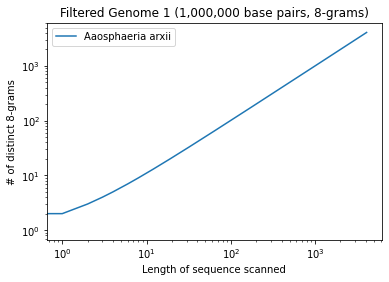

In [308]:
y=(ndistinct)
x=np.arange(len(y))

plt.plot(x,y,label="Aaosphaeria arxii")

ax=plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 1 (1,000,000 base pairs, 8-grams)')

plt.legend()

In [113]:
with open('genomes/genome1_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:1000000]
    
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 8):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
len(ndistinct)

999993

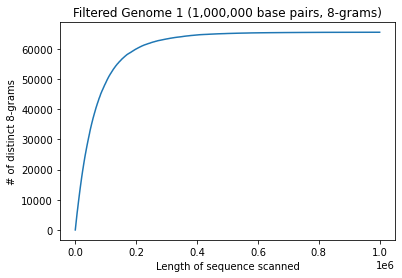

In [114]:
x=np.arange(0,999993,1)
y=(ndistinct)

plt.plot(x,y)

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 1 (1,000,000 base pairs, 8-grams)')

plt.show()

In [3]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [4]:
files = ['genomes/genome1_filtered.fna']

In [14]:
for file in files:
    with open(file) as myfile:
        data = myfile.read().replace('\n','')
    ngramcounts = dict()
    ndistinct1 = []
    for x in seq_ngrams2(data, 3):
    #print(x)
        if x in ngramcounts.keys():
            ngramcounts[x] += 1
        else:
            ngramcounts[x] = 1
        ndistinct1.append(len(ngramcounts))
len(ndistinct1)

38901047

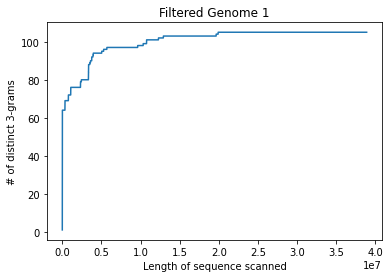

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# x axis values
x=np.arange(1,38901048,1)
y=(ndistinct1)

# plotting the points
plt.plot(x,y)

# naming the x axis
plt.xlabel('Length of sequence scanned')
# naming the y axis
plt.ylabel('# of distinct 3-grams')

# giving a title to my graph
plt.title('Filtered Genome 1')

# function to show the plot
plt.show()

### More About Genome 2 (Abiotrophia defectiva)

In [147]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [148]:
import matplotlib.pyplot as plt
import numpy as np

In [126]:
with open('genomes/genome2_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:1000000]

In [127]:
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 8):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
len(ndistinct)

999993

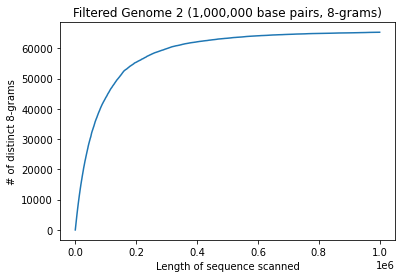

In [128]:
x=np.arange(0,999993,1)
y=(ndistinct)

plt.plot(x,y)

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 2 (1,000,000 base pairs, 8-grams)')

plt.show()

### More About Genome 3 (Abditibacterium utsteinense)

In [149]:
def seq_ngrams2(xs, n):
    return (xs[i:i+n] for i in range(len(xs)-n+1))

In [150]:
import matplotlib.pyplot as plt
import numpy as np

In [134]:
with open('genomes/genome3_filtered.fna','r') as file:
    data = file.read().replace('\n','')
    genome = data[:1000000]
    
ngramcounts = dict()
ndistinct = []
for x in seq_ngrams2(genome, 8):
    #print(x)
    if x in ngramcounts.keys():
        ngramcounts[x] += 1
    else:
        ngramcounts[x] = 1
    ndistinct.append(len(ngramcounts))
len(ndistinct)

999993

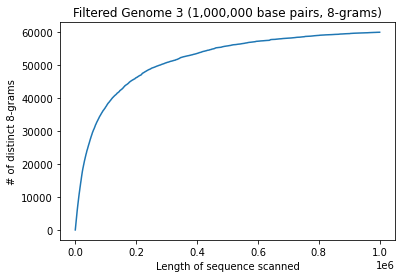

In [132]:
x=np.arange(0,999993,1)
y=(ndistinct)

plt.plot(x,y)

plt.xlabel('Length of sequence scanned')
plt.ylabel('# of distinct 8-grams')

plt.title('Filtered Genome 3 (1,000,000 base pairs, 8-grams)')

plt.show()